In [1]:
import pandas as pd

df = pd.read_csv("lesson3-data.csv")
display(df.head())


CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


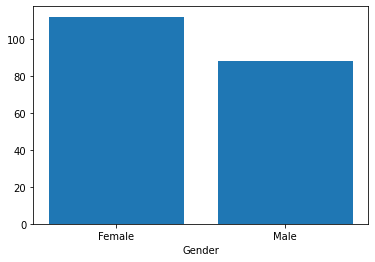

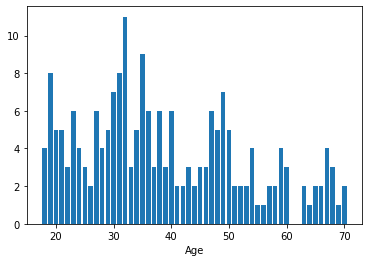

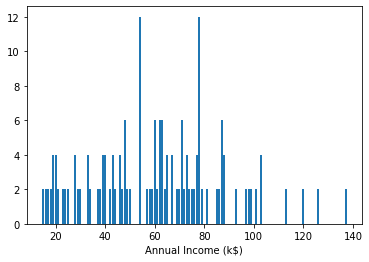

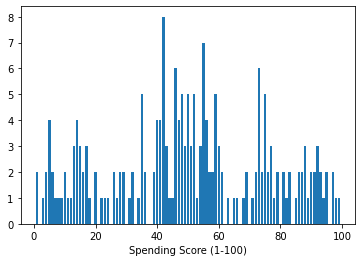

Male


<Figure size 432x432 with 0 Axes>

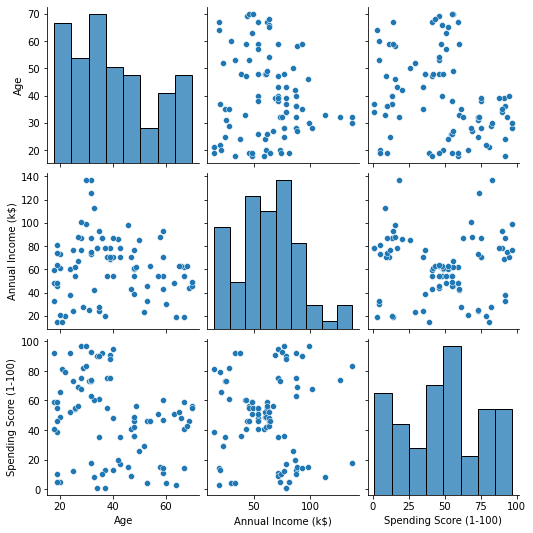

Female


<Figure size 432x432 with 0 Axes>

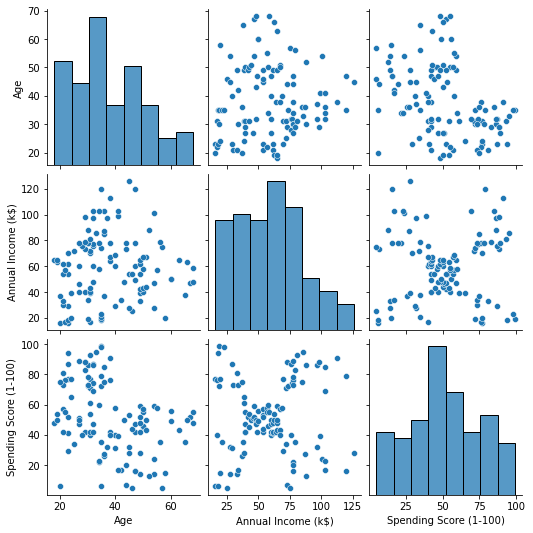

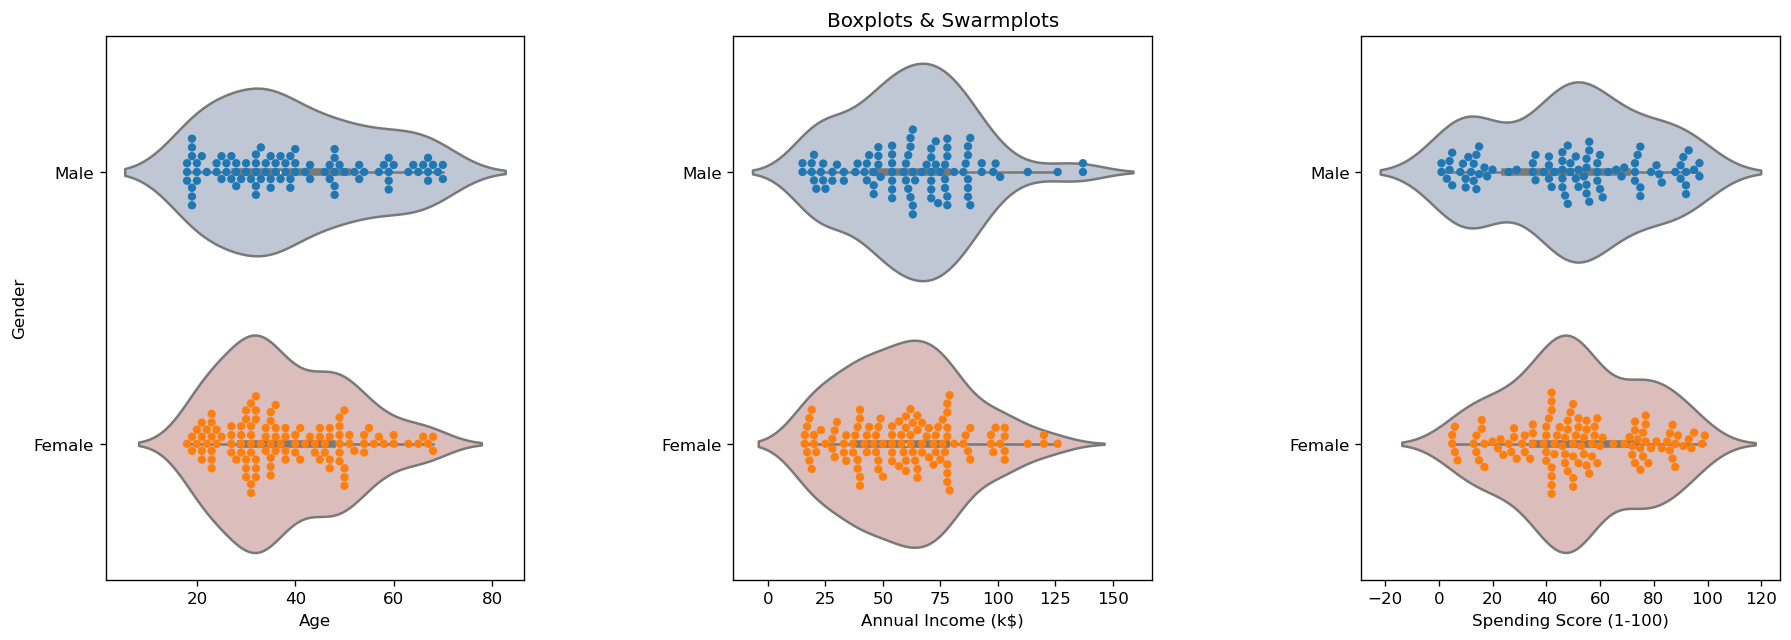

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

print(df.describe())

for label in df.columns[1:]:
    res = df.groupby(label).count().CustomerID
    fig, ax = plt.subplots()
    ax.set_xlabel(label)
    plt.bar(res.index,res)
    
    plt.show()



for gender in ["Male","Female"]:
    fig = plt.figure(figsize=(6,6)) 
    print(gender)
    sns.pairplot(df[df["Gender"] == gender].iloc[:,1:])
    plt.show()


fig = plt.figure(figsize=(18,6),dpi=120) 
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()


Female


CustomerID  Gender  Annual Income (k$)  Spending Score (1-100)
2             3  Female           -1.670170               -1.896392
3             4  Female           -1.670170                1.061072
4             5  Female           -1.631553               -0.480142
5             6  Female           -1.631553                1.019418
6             7  Female           -1.592937               -1.896392
..          ...     ...                 ...                     ...
191         192  Female            1.689478                0.727837
193         194  Female            2.075645                1.644234
194         195  Female            2.345961               -1.479848
195         196  Female            2.345961                1.144381
196         197  Female            2.577661               -0.979995

[112 rows x 4 columns]

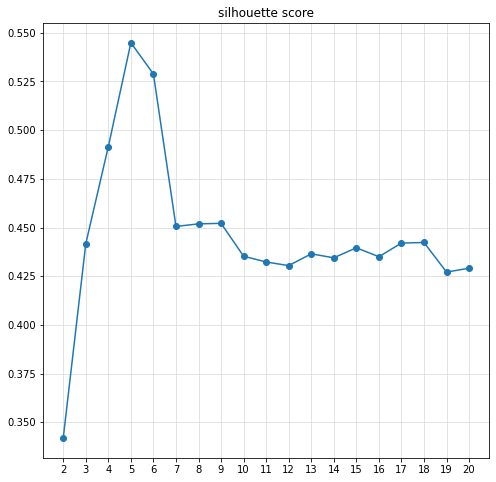

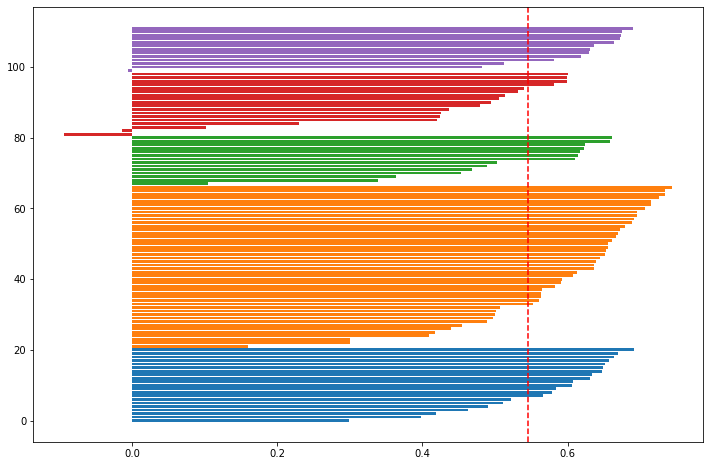

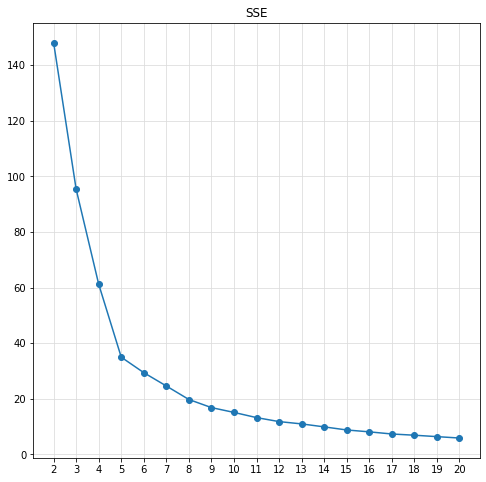

Male


CustomerID Gender  Annual Income (k$)  Spending Score (1-100)
0             1   Male           -1.783064               -0.342902
1             2   Male           -1.783064                1.171276
8             9   Male           -1.632044               -1.640770
10           11   Male           -1.632044               -1.244199
14           15   Male           -1.594289               -1.280251
..          ...    ...                 ...                     ...
187         188   Male            1.463863                0.702602
192         193   Male            1.916922               -1.460510
197         198   Male            2.407737                0.918913
198         199   Male            2.823041               -1.099992
199         200   Male            2.823041                1.243380

[88 rows x 4 columns]

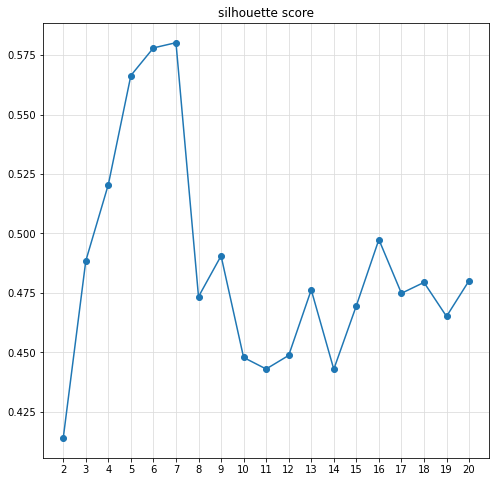

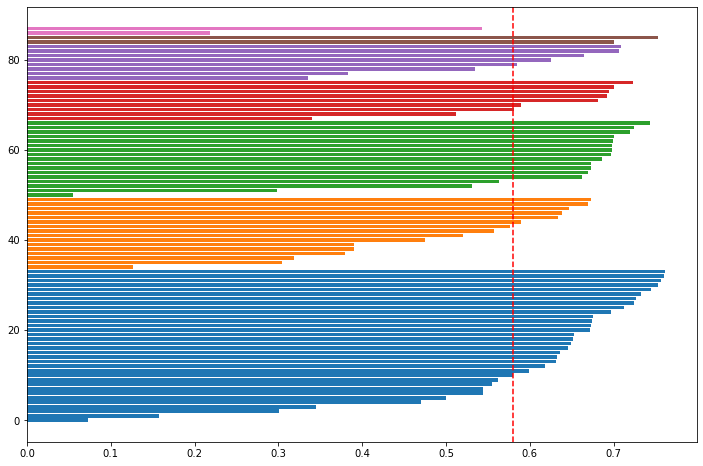

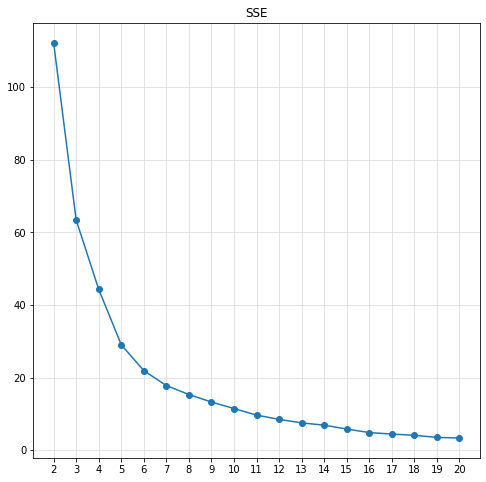

Female|Male


CustomerID  Gender  Annual Income (k$)  Spending Score (1-100)
0             1    Male           -1.738999               -0.434801
1             2    Male           -1.738999                1.195704
2             3  Female           -1.700830               -1.715913
3             4  Female           -1.700830                1.040418
4             5  Female           -1.662660               -0.395980
..          ...     ...                 ...                     ...
195         196  Female            2.268791                1.118061
196         197  Female            2.497807               -0.861839
197         198    Male            2.497807                0.923953
198         199    Male            2.917671               -1.250054
199         200    Male            2.917671                1.273347

[200 rows x 4 columns]

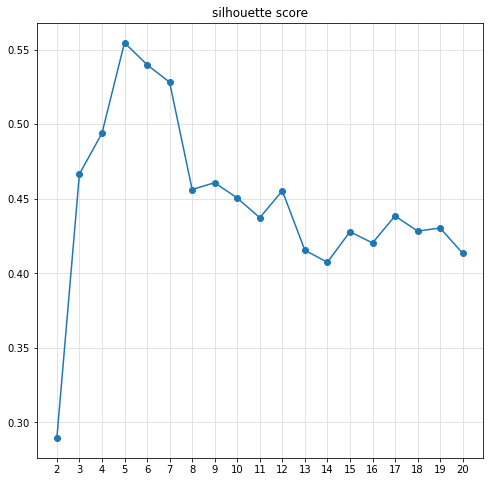

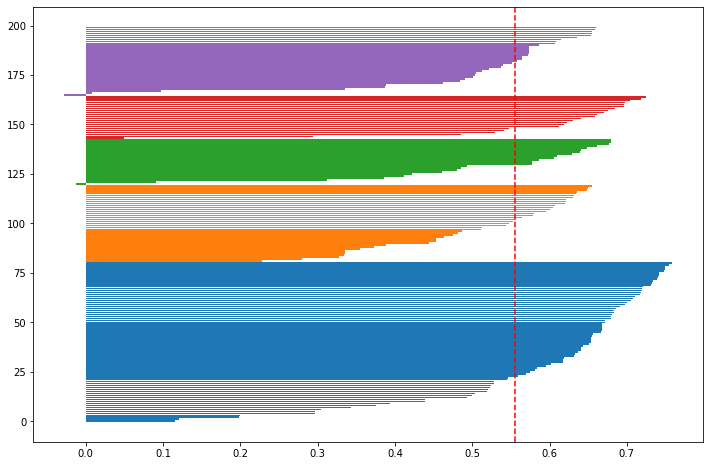

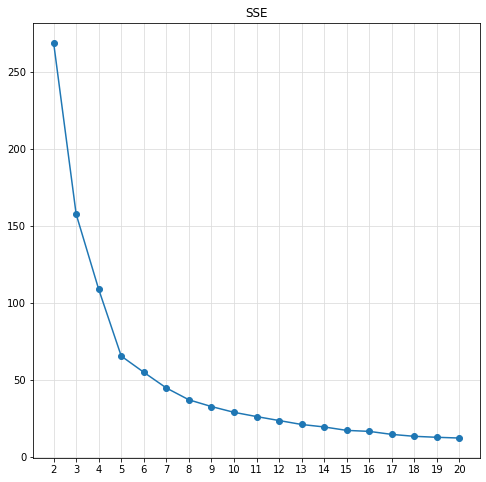

In [3]:
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import StandardScaler
import numpy as np

#クラスタリングにGenderは使わない場合


df1 = df.copy()
genderLabel = ['Female','Male','Female|Male']


for g in genderLabel:
    print(g)
    df2 = df1[df1.Gender.str.contains(g)].iloc[:,3:]
    
    sc = StandardScaler()
    df3 = pd.DataFrame(sc.fit_transform(df2.astype(float)))
    df3.index = df2.index
    df3.columns = df2.columns


    df3.insert(0, 'CustomerID', df1[df1.Gender.str.contains(g)].iloc[:,0])
    df3.insert(1, 'Gender', df1[df1.Gender.str.contains(g)].iloc[:,1])
    display(df3)

    clusterNumList = []
    scoreList = []
    sseList = []
    samples_silhouette_valueList = []
    clusterIDList = []

    for i in range(2,21):
        kmeans = KMeans(n_clusters=i, init='k-means++')
        res = kmeans.fit_predict(df3.iloc[:,2:])
        score = silhouette_score(df3.iloc[:,2:], res, metric='euclidean') #全体のシルエット係数
        silhouette_values = silhouette_samples(df3.iloc[:,2:], res)#データ1件ずつのシルエット係数
        #print(i,score,kmeans.inertia_)
        clusterNumList.append(i)
        scoreList.append(score)
        sseList.append(kmeans.inertia_)
        samples_silhouette_valueList.append(silhouette_values)
        clusterIDList.append(res)
        

      
    #クラスター数とシルエット係数の関係のグラフ
    fig, ax = plt.subplots()
    fig.set_figheight(8)
    fig.set_figwidth(8)
    plt.title("silhouette score")
    plt.xticks(range(1,21))
    ax.grid(c='gainsboro', zorder=9)
    plt.plot(clusterNumList,scoreList,marker="o")
    plt.show()
    
    
    #シルエット図
    index = np.argmax(scoreList)#シルエット係数が最大となったクラスター数に対応するindexを取得
    
    silhouetteDF = pd.DataFrame( clusterIDList[index], columns=["Cluster"])
    silhouetteDF["Silhouette"] = samples_silhouette_valueList[index]

    
    fig, ax = plt.subplots()
    fig.set_figheight(8)
    fig.set_figwidth(12)
    
    

    y_delta = 0
    for i in range(clusterNumList[index]):
        y_pos = np.arange(len(silhouetteDF[silhouetteDF["Cluster"]==i]))+y_delta
        ax.barh(y_pos, silhouetteDF[silhouetteDF["Cluster"]==i]["Silhouette"].sort_values(),label="Cluster"+str(i+1))
        y_delta += len(silhouetteDF[silhouetteDF["Cluster"]==i])
        
    silhouette_avg = np.mean(samples_silhouette_valueList[index])                 # シルエット係数の平均値
    plt.axvline(silhouette_avg,color="red",linestyle="--")    # 係数の平均値に破線を引く 
    plt.show()
    
        

    #fig = plt.figure(figsize=(8,8))
    fig, ax = plt.subplots()
    fig.set_figheight(8)
    fig.set_figwidth(8)
    plt.title("SSE")
    plt.xticks(range(1,21))
    ax.grid(c='gainsboro', zorder=9)
    plt.plot(clusterNumList,sseList,marker="o")
    plt.show()


CustomerID       Age  Annual Income (k$)  Spending Score (1-100)  \
0             1 -1.424569           -1.738999               -0.434801   
1             2 -1.281035           -1.738999                1.195704   
2             3 -1.352802           -1.700830               -1.715913   
3             4 -1.137502           -1.700830                1.040418   
4             5 -0.563369           -1.662660               -0.395980   
..          ...       ...                 ...                     ...   
195         196 -0.276302            2.268791                1.118061   
196         197  0.441365            2.497807               -0.861839   
197         198 -0.491602            2.497807                0.923953   
198         199 -0.491602            2.917671               -1.250054   
199         200 -0.635135            2.917671                1.273347   

     Gender_Male  
0       1.128152  
1       1.128152  
2      -0.886405  
3      -0.886405  
4      -0.886405  
..           ...  
195    -0.886405  
196    -0.886405  
197     1.128152  
198     1.128152  
199     1.128152  

[200 rows x 5 columns]

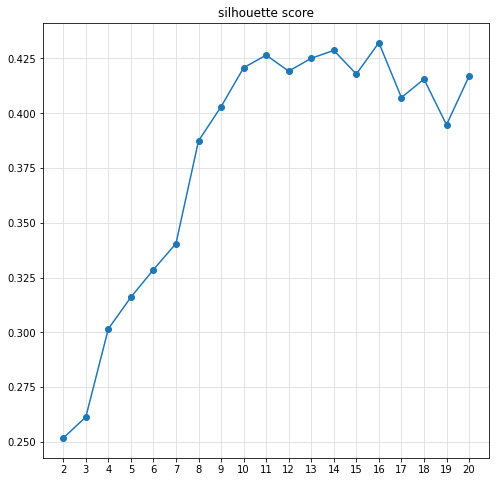

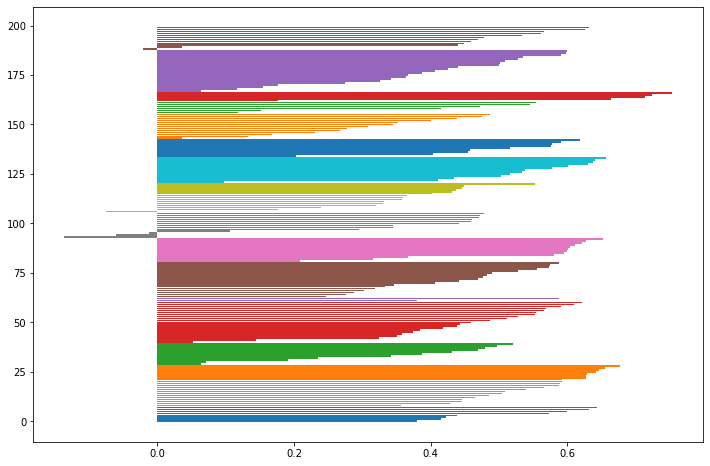

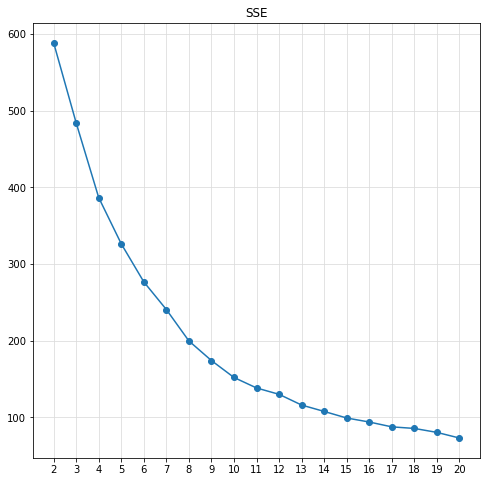

In [6]:
#性別をダミー変数にする


df1 = df.copy()
df2 = df1.iloc[:,1:]

df2 = pd.get_dummies(df2,drop_first=True)

sc = StandardScaler()
df3 = pd.DataFrame(sc.fit_transform(df2.astype(float)))
df3.index = df2.index
df3.columns = df2.columns

df3.insert(0, 'CustomerID', df1["CustomerID"])
display(df3)

clusterNumList = []
scoreList = []
sseList = []
sample_silhouette_valuesList = []
clusterIDList = []

for i in range(2,21):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    res = kmeans.fit_predict(df3.iloc[:,1:])
    score = silhouette_score(df3.iloc[:,1:], res, metric='euclidean')
    sample_silhouette_values = silhouette_samples(df3.iloc[:,1:], res)
    #print(i,score,kmeans.inertia_)
    clusterNumList.append(i)
    scoreList.append(score)
    sseList.append(kmeans.inertia_)
    sample_silhouette_valuesList.append(sample_silhouette_values)
    clusterIDList.append(res)



#fig = plt.figure(figsize=(8,8))
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(8)
plt.title("silhouette score")
plt.xticks(range(1,21))
ax.grid(c='gainsboro', zorder=9)
plt.plot(clusterNumList,scoreList,marker="o")
plt.show()

index = np.argmax(scoreList) #シルエット係数が最も高いindexを取り出す

silhouetteDF = pd.DataFrame( clusterIDList[index], columns=["Cluster"])
silhouetteDF["Silhouette"] = sample_silhouette_valuesList[index]


fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)

y_delta = 0
for i in range(clusterNumList[index]):
    y_pos = np.arange(len(silhouetteDF[silhouetteDF["Cluster"]==i]))+y_delta
    ax.barh(y_pos, silhouetteDF[silhouetteDF["Cluster"]==i]["Silhouette"].sort_values(),label="Cluster"+str(i+1))
    y_delta += len(silhouetteDF[silhouetteDF["Cluster"]==i])
plt.show()



fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(8)
plt.title("SSE")
plt.xticks(range(1,21))
ax.grid(c='gainsboro', zorder=9)
plt.plot(clusterNumList,sseList,marker="o")
plt.show()

Female


CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)
2             3  Female -1.437790           -1.670170               -1.896392
3             4  Female -1.199459           -1.670170                1.061072
4             5  Female -0.563909           -1.631553               -0.480142
5             6  Female -1.278903           -1.631553                1.019418
6             7  Female -0.246134           -1.592937               -1.896392
..          ...     ...       ...                 ...                     ...
191         192  Female -0.484465            1.689478                0.727837
193         194  Female -0.007803            2.075645                1.644234
194         195  Female  0.707191            2.345961               -1.479848
195         196  Female -0.246134            2.345961                1.144381
196         197  Female  0.548304            2.577661               -0.979995

[112 rows x 5 columns]

Age                           Annual Income (k$)                  \
        min max       mean        std                min  max       mean   
cluster                                                                    
0        18  68  41.521739  14.744851                 39   69  54.543478   
1        20  65  43.214286  11.682851                 16   39  27.357143   
2        23  57  41.388889  10.181522                 70  126  89.055556   
3        20  35  25.461538   5.221995                 16   39  25.692308   
4        27  38  32.190476   3.076021                 70  120  86.047619   

                   Spending Score (1-100)                            
               std                    min max       mean        std  
cluster                                                              
0         9.064477                     40  61  49.521739   6.159867  
1         8.063280                      5  40  21.714286  12.079408  
2        16.748915                      5  40  23.722222  10.242963  
3         8.239990                     65  99  80.538462  10.697472  
4        14.157953                     69  95  81.666667   7.831560

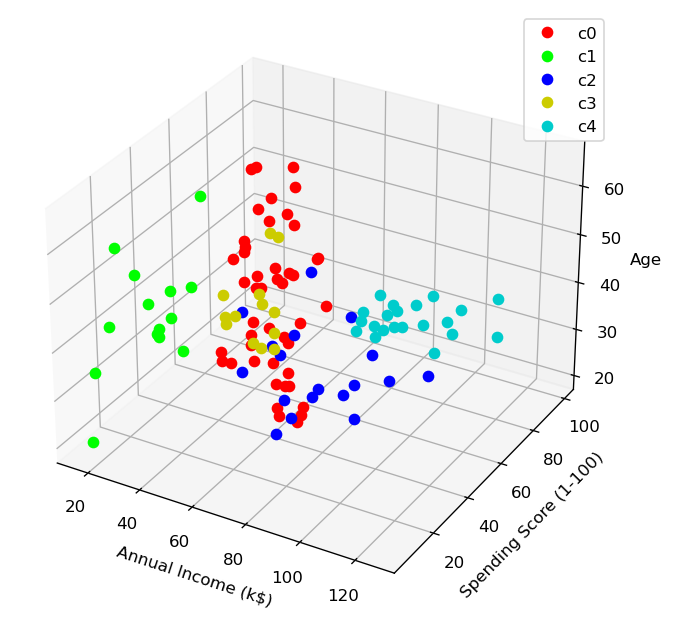

Male


CustomerID Gender       Age  Annual Income (k$)  Spending Score (1-100)
0             1   Male -1.348779           -1.783064               -0.342902
1             2   Male -1.219131           -1.783064                1.171276
8             9   Male  1.568297           -1.632044               -1.640770
10           11   Male  1.762768           -1.632044               -1.244199
14           15   Male -0.181949           -1.594289               -1.280251
..          ...    ...       ...                 ...                     ...
187         188   Male -0.765364            1.463863                0.702602
192         193   Male -0.441245            1.916922               -1.460510
197         198   Male -0.506068            2.407737                0.918913
198         199   Male -0.506068            2.823041               -1.099992
199         200   Male -0.635716            2.823041                1.243380

[88 rows x 5 columns]

Age                           Annual Income (k$)                  \
        min max       mean        std                min  max       mean   
cluster                                                                    
0        18  35  25.000000   5.612486                 15   38  25.777778   
1        18  70  45.441176  18.289244                 39   71  54.735294   
2        27  40  33.277778   4.389902                 69  137  87.111111   
3        19  59  39.315789  12.867067                 71  137  85.894737   
4        19  67  48.375000  16.612710                 15   33  22.875000   

                   Spending Score (1-100)                            
               std                    min max       mean        std  
cluster                                                              
0         6.960204                     61  92  77.666667  10.606602  
1         8.324148                     35  60  49.852941   6.858449  
2        18.929867                     63  97  82.666667  11.103788  
3        16.110365                      1  36  12.947368   8.422679  
4         6.034129                      3  39  17.625000  14.676877

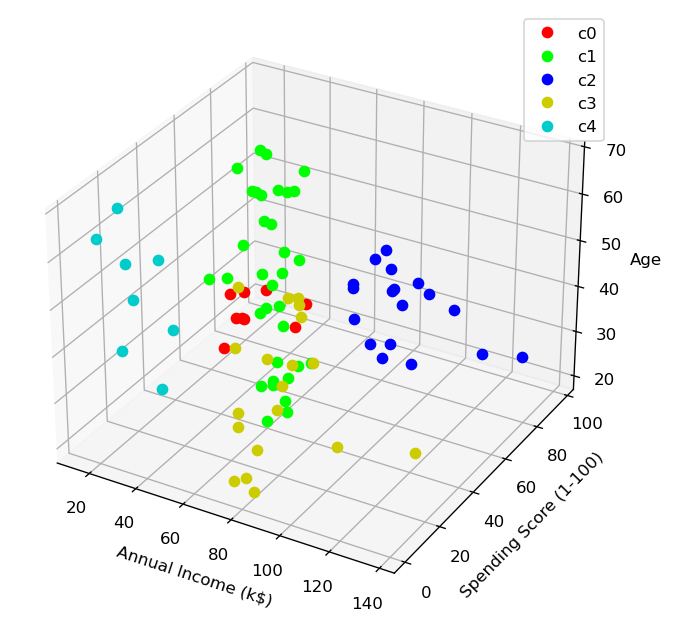

Male|Female


CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male -1.424569           -1.738999               -0.434801
1             2    Male -1.281035           -1.738999                1.195704
2             3  Female -1.352802           -1.700830               -1.715913
3             4  Female -1.137502           -1.700830                1.040418
4             5  Female -0.563369           -1.662660               -0.395980
..          ...     ...       ...                 ...                     ...
195         196  Female -0.276302            2.268791                1.118061
196         197  Female  0.441365            2.497807               -0.861839
197         198    Male -0.491602            2.497807                0.923953
198         199    Male -0.491602            2.917671               -1.250054
199         200    Male -0.635135            2.917671                1.273347

[200 rows x 5 columns]

Age                           Annual Income (k$)                  \
        min max       mean        std                min  max       mean   
cluster                                                                    
0        18  35  25.272727   5.257030                 15   39  25.727273   
1        19  59  41.114286  11.341676                 70  137  88.200000   
2        19  67  45.217391  13.228607                 15   39  26.304348   
3        27  40  32.692308   3.728650                 69  137  86.538462   
4        18  70  42.716049  16.447822                 39   76  55.296296   

                   Spending Score (1-100)                            
               std                    min max       mean        std  
cluster                                                              
0         7.566731                     61  99  79.363636  10.504174  
1        16.399067                      1  39  17.114286   9.952154  
2         7.893811                      3  40  20.913043  13.017167  
3        16.312485                     63  97  82.128205   9.364489  
4         8.988109                     34  61  49.518519   6.530909

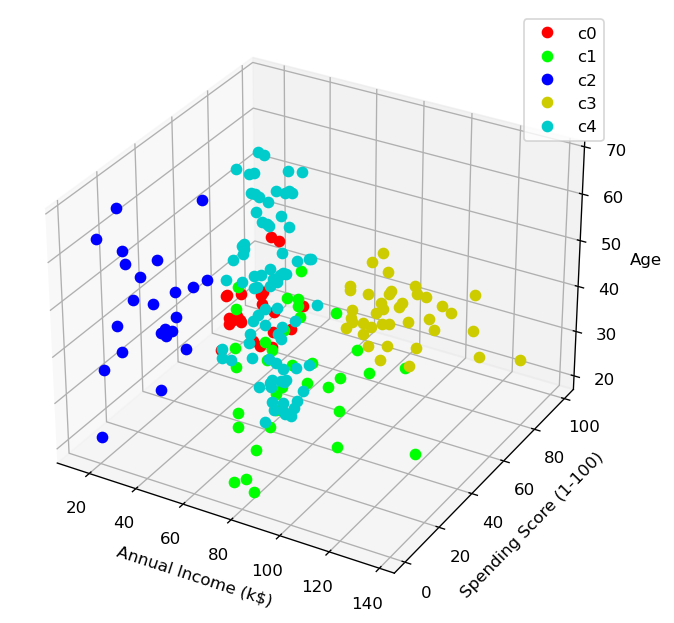

In [7]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline
import plotly
plotly.offline.init_notebook_mode() 

genderLabel = ['Female','Male','Male|Female']
colors = ["#ff0000", "#00ff00", "#0000ff", "#cccc00", "#00cccc", "#cc00cc", "#ccccc0", "#c0cccc", "#ccc0cc", "#0c0c0c"]
for g in genderLabel:
    print(g)
    df2 = df1[df1.Gender.str.contains(g)].iloc[:,2:]
    sc = StandardScaler()
    df3 = pd.DataFrame(sc.fit_transform(df2.astype(float)))
    df3.index = df2.index
    df3.columns = df2.columns

    df3.insert(0, 'CustomerID', df1[df1.Gender.str.contains(g)].iloc[:,0])
    df3.insert(1, 'Gender', df1[df1.Gender.str.contains(g)].iloc[:,1])
    #df3.insert(2, 'Age', df1[df1.Gender.str.contains(g)].iloc[:,2])

    clusterNum = 5
    res = KMeans(n_clusters=clusterNum, init='k-means++').fit_predict(df3.iloc[:,3:])

    df2["cluster"] = res
    display(df3)
    display(df2.groupby("cluster").agg(['min', 'max', 'mean','std']))
    fig = plt.figure(figsize=(5,5),dpi=120)
    ax = Axes3D(fig)

    ax.set_xlabel("Annual Income (k$)")
    ax.set_ylabel("Spending Score (1-100)")
    ax.set_zlabel("Age")
    for i in range(clusterNum):
        ax.plot(df2[df2["cluster"]==i]["Annual Income (k$)"],df2[df2["cluster"]==i]["Spending Score (1-100)"],df2[df2["cluster"]==i]["Age"],c=colors[i],label="c"+str(i),marker="o",linestyle='None')
    #plt.scatter(df3[df3["cluster"]==i]["Annual Income (k$)"],df3[df3["cluster"]==i]["Spending Score (1-100)"],label="c"+str(i))
    plt.legend()
    plt.show()

    data = []
    for i in range(clusterNum):
        data.append(plotly.graph_objs.Scatter3d( x=df2[df2["cluster"]==i]["Annual Income (k$)"],
                                                 y=df2[df2["cluster"]==i]["Spending Score (1-100)"],
                                                 z=df2[df2["cluster"]==i]["Age"],
                                                mode='markers',marker=dict(size=3, color=i),name="C"+str(i)))
        
                
    #figure = plotly.graph_objs.Figure(data=[trace])
    layout = plotly.graph_objs.Layout(
        title=g,
        xaxis=dict(title='"Annual Income (k$)'),
        yaxis=dict(title='Spending Score (1-100)'),
        showlegend=True)
    
    fig = plotly.graph_objs.Figure(data=data, layout=layout)
    fig.update_layout(scene=dict(xaxis=dict(title='"Annual Income (k$)'),
        yaxis=dict(title='Spending Score (1-100)'),zaxis=dict(title="Age")))
    plotly.offline.iplot(fig)



Female


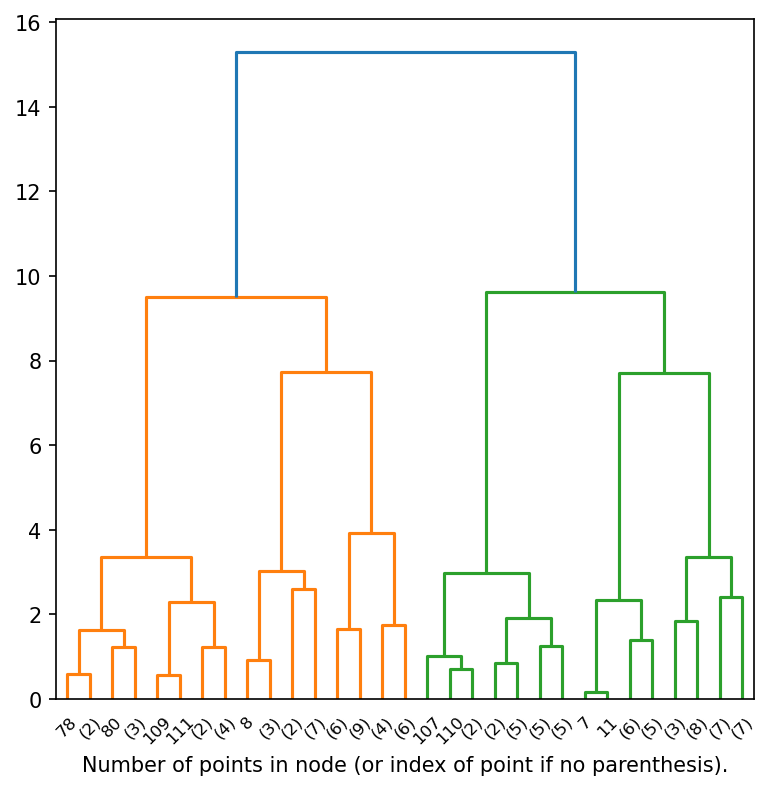

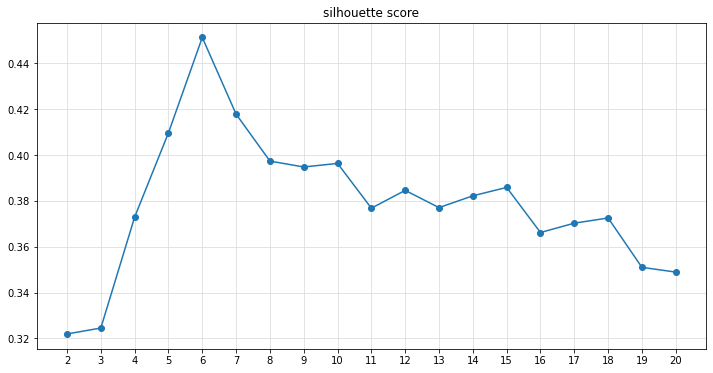

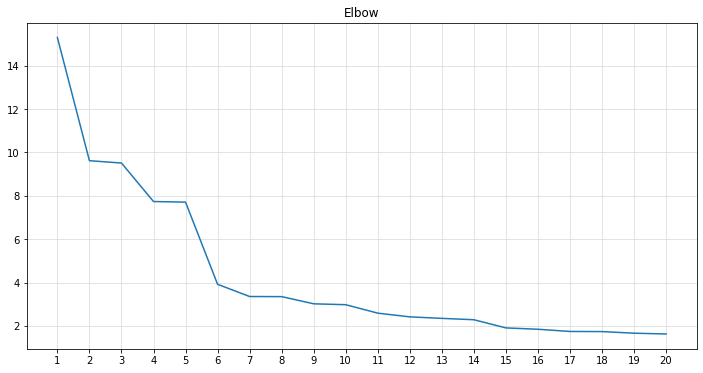

Male


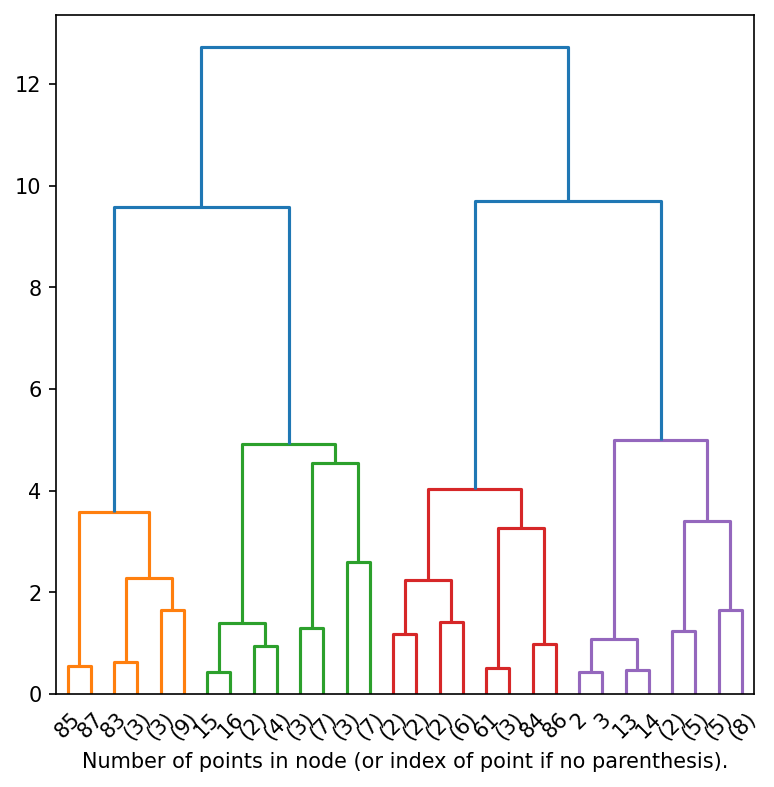

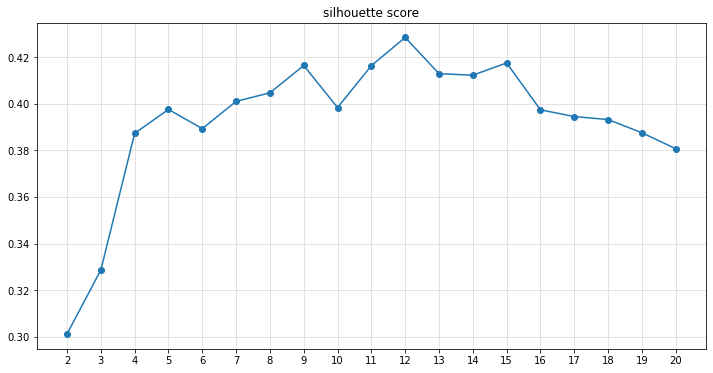

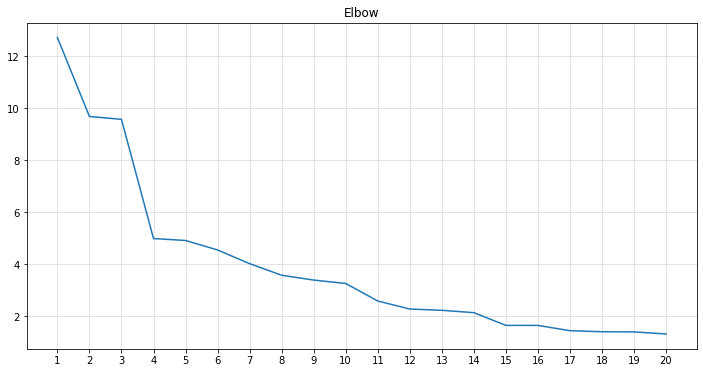

Male|Female


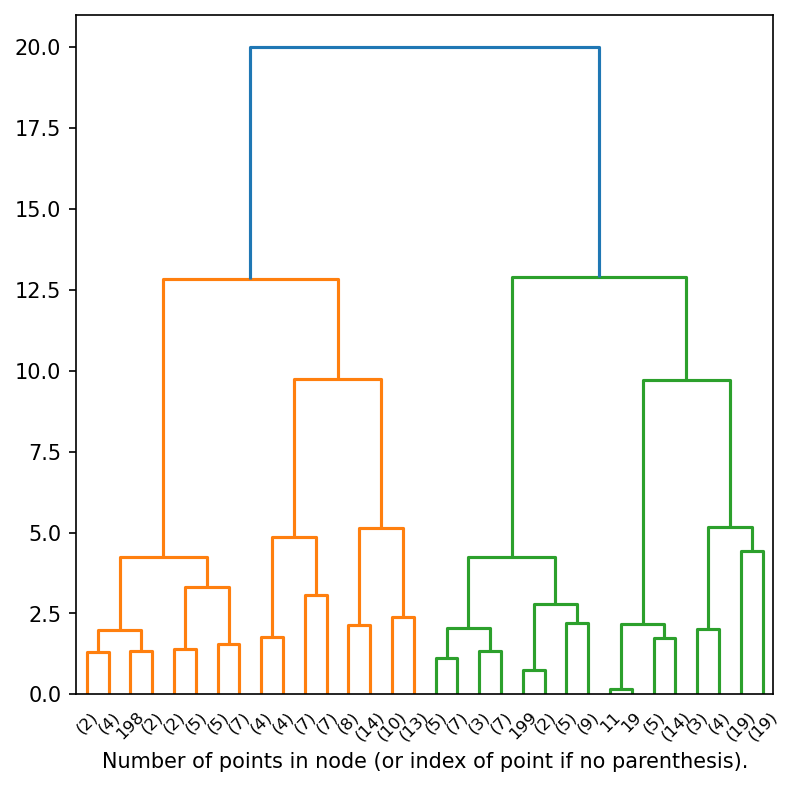

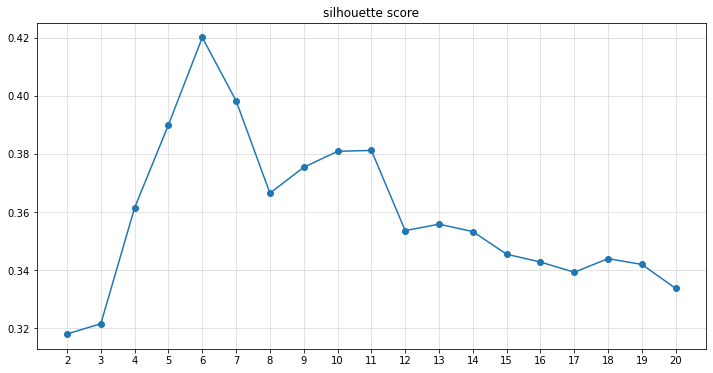

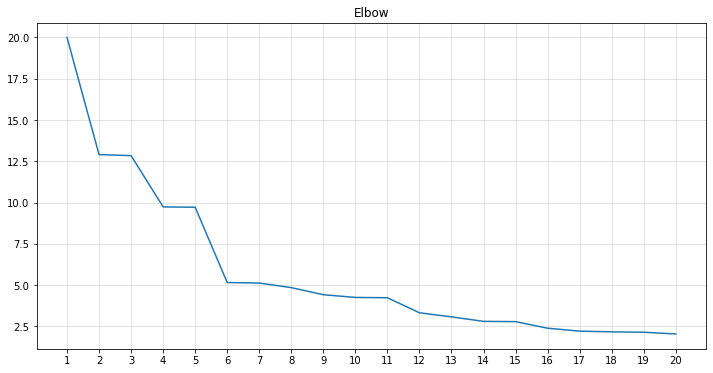

In [17]:
#階層型クラスタリング
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram


    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
    return linkage_matrix




from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import StandardScaler


df1 = df.copy()

genderLabel = ['Female','Male','Male|Female']

for g in genderLabel:
    print(g)
    df2 = df1[df1.Gender.str.contains(g)].iloc[:,2:]
    sc = StandardScaler()
    df3 = pd.DataFrame(sc.fit_transform(df2.astype(float)))
    df3.index = df2.index
    df3.columns = df2.columns


    df3.insert(0, 'CustomerID', df1[df1.Gender.str.contains(g)].iloc[:,0])
    df3.insert(1, 'Gender', df1[df1.Gender.str.contains(g)].iloc[:,1])


    
    model = AgglomerativeClustering(affinity='euclidean', linkage='ward',distance_threshold=0, n_clusters=None)

    model = model.fit(df3.iloc[:,2:])
    
    fig = plt.figure(figsize=(6,6),dpi=150)
    
    linkage_matrix = plot_dendrogram(model, truncate_mode='level', p=4)
   
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()

   
    
    clusterNumList = []
    scoreList = []

    for i in range(2,21):
        clusters = fcluster(linkage_matrix, t=i, criterion='maxclust')
        score = silhouette_score(df3.iloc[:,2:], clusters, metric='euclidean')
        #print(i,score)
        clusterNumList.append(i)
        scoreList.append(score)
    

    fig, ax = plt.subplots()
    fig.set_figheight(6)
    fig.set_figwidth(12)
    plt.title("silhouette score")
    plt.xticks(range(1,21))
    ax.grid(c='gainsboro', zorder=9) 
    plt.plot(clusterNumList,scoreList,marker="o")
    plt.show()
    
    
    
    fig, ax = plt.subplots()
    fig.set_figheight(6)
    fig.set_figwidth(12)
    plt.title("Elbow")
    plt.xticks(range(1,21))
    ax.grid(c='gainsboro', zorder=9)
    
    last = linkage_matrix[-20:, 2]
    last_rev = last[::-1]
    idxs = np.arange(1, len(last) + 1)

    plt.plot(idxs, last_rev)
    plt.show()
    

    
    max_index = np.argmax(scoreList)
    clusters = fcluster(linkage_matrix, t=clusterNumList[max_index], criterion='maxclust')
    score = silhouette_score(df3.iloc[:,2:], clusters, metric='euclidean')
        
    df3["cluster"] = clusters

    data = []
    for j in range(1,clusterNumList[max_index]+1):
        data.append(plotly.graph_objs.Scatter3d( x=df3[df3["cluster"]==j]["Annual Income (k$)"],
                                                 y=df3[df3["cluster"]==j]["Spending Score (1-100)"],
                                                 z=df3[df3["cluster"]==j]["Age"],
                                                mode='markers',marker=dict(size=3)))
    layout = plotly.graph_objs.Layout(
            title=str(clusterNumList[max_index]) +" clusters",
            showlegend=True)

    
    
    fig = plotly.graph_objs.Figure(data=data, layout=layout)
    fig.update_layout(scene=dict(xaxis=dict(title='"Annual Income (k$)'),
        yaxis=dict(title='Spending Score (1-100)'),zaxis=dict(title="Age")))
    plotly.offline.iplot(fig)
    
    print("=========================================")
    



